In [114]:
import pyspark as ps
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np


In [115]:
species = pd.read_csv('species.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'species.csv'

In [ ]:
print(species.head())

   Unnamed: 0               Species Name            Common Name          Type  \
0           0        Abies beshanzuensis            Baishan fir  Plant (Tree)   
1           1            Actinote zikani                      -        Insect   
2           2      Aipysurus foliosquama  Leaf scaled sea-snake       Reptile   
3           3    Amanipodagrion gilliesi         Amani flatwing        Insect   
4           4  Antisolabis seychellensis                      -        Insect   

                                       Location(s)  Estimated Population  \
0              Baishanzu Mountain, Zhejiang, China  5 mature individuals   
1          Near São Paulo, Atlantic forest, Brazil               Unknown   
2        Ashmore Reef and Hibernia Reef, Timor Sea               Unknown   
3  Amani-Sigi Forest, Usambara Mountains, Tanzania     < 500 individuals   
4             Morne Blanc, Mahé island, Seychelles               Unknown   

                                             Threats  
0

In [ ]:
# change title for for first cell
species.rename(columns = {'Unnamed: 0':'species_id'}, inplace = True)

In [ ]:
#print first row of species
print(species.head(1))

   species_id         Species Name  Common Name          Type  \
0           0  Abies beshanzuensis  Baishan fir  Plant (Tree)   

                           Location(s)  Estimated Population  \
0  Baishanzu Mountain, Zhejiang, China  5 mature individuals   

             Threats  
0  Agriculture, fire  


In [ ]:
#number of rows

print(species.shape)

(90, 7)


In [ ]:
#identify unique threats 
print(species.Threats.unique())

['Agriculture, fire' 'Habitat loss from human expansion'
 'Unknown—probably degradation of coral reef habitat'
 'Population pressure, water pollution' 'Invasive species, climate change'
 'Recreational facilities, water diversion'
 'Competition, predation by Gambusia, road construction'
 'Hunting, cave disturbance' 'Hydropower development'
 'Agricultural development, energy transmission lines'
 'Illegal collection for international pet trade'
 'Chytridiomycosis, logging, agricultural expansion'
 'Agriculture, hunting, fishing, introduced fish'
 'Climate change, oceanographic changes related to the 1982/1983 El Nino'
 'Over-fishing due to value of swim-bladder in traditional medicine'
 'Illegal export to China' 'Forest clearance, overgrazing, development'
 'Habitat loss, competition with livestock, poaching'
 'Disease from commercial bees, habitat destruction and degradation'
 'Large-scale deforestation and logging'
 'Illegal logging of mangrove forests for firewood and construction, hun

In [ ]:
# remove rows with threats as nan

species = species.dropna(subset=['Threats'])

In [ ]:
print(species.shape)

(89, 7)


In [ ]:
# gather all the unique regions
locations = species['Location(s)']

# create a list of all the unique regions
locations_list = []
for location in locations:
    locations_list.append(location.split(', '))



In [ ]:
print(locations_list)

[['Baishanzu Mountain', 'Zhejiang', 'China'], ['Near São Paulo', 'Atlantic forest', 'Brazil'], ['Ashmore Reef and Hibernia Reef', 'Timor Sea'], ['Amani-Sigi Forest', 'Usambara Mountains', 'Tanzania'], ['Morne Blanc', 'Mahé island', 'Seychelles'], ['Chapado do Araripe', 'South Ceará', 'Brazil'], ['South-eastern shore of former Lake Aci', 'Turkey'], ['Luplupwintern Cave', 'Western Province', 'Papua NG'], ['Bhutan', 'North East India', 'Myanmar'], ['Rajasthan', 'Gujarat', 'Maharashtra', 'India'], ['Baly Bay region', 'northwestern Madagascar'], ['Azuay', 'Cañar', 'Guyas provinces', 'Ecuador'], ['Volcanic lakes north of Bealanana', 'Madagascar'], ['Unknown'], ['Chinese coast from Yangtze River', 'China to Hong Kong'], ['Bangladesh', 'Cambodia', 'India', 'Indonesia', 'Malaysia'], ['Budini and Lafeti Khola', 'Bhutan'], ['South-east Kenya', 'possibly south-west Somalia'], ['Oregon and California'], ['Atlantic forest', 'south-eastern Brazil'], ['Isla Escudo de Veraguas', 'Panama'], ['Pool on Ga

In [ ]:
#shape of locations_list
print(len(locations_list))

89


In [ ]:
# append it to the species dataframe new coulumn
species = species.copy()
species['location_list'] = locations_list


In [ ]:
species.head()

,species_id,Species Name,Common Name,Type,Location(s),Estimated Population,Threats,location_list
0,0,Abies beshanzuensis,Baishan fir,Plant (Tree),"Baishanzu Mountain, Zhejiang, China",5 mature individuals,"Agriculture, fire","[Baishanzu Mountain, Zhejiang, China]"
1,1,Actinote zikani,-,Insect,"Near São Paulo, Atlantic forest, Brazil",Unknown,Habitat loss from human expansion,"[Near São Paulo, Atlantic forest, Brazil]"
2,2,Aipysurus foliosquama,Leaf scaled sea-snake,Reptile,"Ashmore Reef and Hibernia Reef, Timor Sea",Unknown,Unknown—probably degradation of coral reef hab...,"[Ashmore Reef and Hibernia Reef, Timor Sea]"
3,3,Amanipodagrion gilliesi,Amani flatwing,Insect,"Amani-Sigi Forest, Usambara Mountains, Tanzania",< 500 individuals,"Population pressure, water pollution","[Amani-Sigi Forest, Usambara Mountains, Tanzania]"
4,4,Antisolabis seychellensis,-,Insect,"Morne Blanc, Mahé island, Seychelles",Unknown,"Invasive species, climate change","[Morne Blanc, Mahé island, Seychelles]"


In [ ]:
# show me the lsit of locations with 1 item in the list
for location in locations_list:
    if len(location) == 1:
        print(location)


['Unknown']
['Oregon and California']
["Côte d'Ivoire"]
['Mauritius']
['Coastal tropical and subtropical waters of Indo-Pacific and Atlantic Oceans']
['Mauritius']
['Northeastern Vietnam']


In [ ]:
#drop unknown locations

species = species[species['Location(s)'] != 'Unknown']

In [ ]:
for location in locations_list:
    if len(location) == 2:
        print(location)

['Ashmore Reef and Hibernia Reef', 'Timor Sea']
['South-eastern shore of former Lake Aci', 'Turkey']
['Baly Bay region', 'northwestern Madagascar']
['Volcanic lakes north of Bealanana', 'Madagascar']
['Chinese coast from Yangtze River', 'China to Hong Kong']
['Budini and Lafeti Khola', 'Bhutan']
['South-east Kenya', 'possibly south-west Somalia']
['Atlantic forest', 'south-eastern Brazil']
['Isla Escudo de Veraguas', 'Panama']
['Pool on Gavdos', 'Greece']
["Anosibe An'Ala region", 'eastern Madagascar']
['Two small caves on Silhouette and Mahé', 'Seychelles']
['Pembrokeshire', 'United Kingdom']
['Hellshire Hills', 'Jamaica']
['Deciduous forest', 'East Madagascar']
['Kasyoha-Kitomi Forest Reserve', 'Uganda']
['Hula Valley', 'Israel']
['Grand Bassin', 'Mauritius']
['Massif de la Hotte', 'Haiti']
['Pta Molles and Pichidungui', 'Chile']
['Namatimbili-Ngarama Forest', 'Tanzania']
['Witu Forest Reserve', 'Kenya']
['Lake Ohrid', 'Macedonia']
['Liben Plains', 'southern Ethiopia']
['Kalalau Vall

In [ ]:
print(species.shape)

(88, 8)


In [ ]:
# for each item in the list in location_list, create a column region, city, country
regions = []
cities = []
countries = []

# handle cases with different lengths of location list
for location in locations_list:
    if len(location) == 2:
        regions.append(location[0])
        cities.append('')
        countries.append(location[1])
    elif len(location) == 3:
        regions.append(location[0])
        cities.append(location[1])
        countries.append(location[2])
    else:
        regions.append(location[0])
        cities.append(location[1] if len(location) > 1 else '')
        countries.append(location[2] if len(location) > 2 else '')
# for location in locations_list:
#     regions.append(location[0])
#     cities.append(location[1])
#     countries.append(location[2])

# species['region'] = regions
# species['city'] = cities
# species['country'] = countries


IndexError: list index out of range

In [ ]:
# split threats into a list
species['threats_list'] = species['Threats'].apply(lambda x: x.split(', '))

species.head()

,species_id,Species Name,Common Name,Type,Location(s),Estimated Population,Threats,location_list,threats_list
0,0,Abies beshanzuensis,Baishan fir,Plant (Tree),"Baishanzu Mountain, Zhejiang, China",5 mature individuals,"Agriculture, fire","[Baishanzu Mountain, Zhejiang, China]","[Agriculture, fire]"
1,1,Actinote zikani,-,Insect,"Near São Paulo, Atlantic forest, Brazil",Unknown,Habitat loss from human expansion,"[Near São Paulo, Atlantic forest, Brazil]",[Habitat loss from human expansion]
2,2,Aipysurus foliosquama,Leaf scaled sea-snake,Reptile,"Ashmore Reef and Hibernia Reef, Timor Sea",Unknown,Unknown—probably degradation of coral reef hab...,"[Ashmore Reef and Hibernia Reef, Timor Sea]",[Unknown—probably degradation of coral reef ha...
3,3,Amanipodagrion gilliesi,Amani flatwing,Insect,"Amani-Sigi Forest, Usambara Mountains, Tanzania",< 500 individuals,"Population pressure, water pollution","[Amani-Sigi Forest, Usambara Mountains, Tanzania]","[Population pressure, water pollution]"
4,4,Antisolabis seychellensis,-,Insect,"Morne Blanc, Mahé island, Seychelles",Unknown,"Invasive species, climate change","[Morne Blanc, Mahé island, Seychelles]","[Invasive species, climate change]"


In [ ]:
def regionToSpecies(region):
    return species[species['location_list'].apply(lambda x: region in x)]

print(regionToSpecies('Timor Sea'))

   species_id           Species Name            Common Name     Type  \
2           2  Aipysurus foliosquama  Leaf scaled sea-snake  Reptile   

                                 Location(s) Estimated Population  \
2  Ashmore Reef and Hibernia Reef, Timor Sea              Unknown   

                                             Threats  \
2  Unknown—probably degradation of coral reef hab...   

                                 location_list  \
2  [Ashmore Reef and Hibernia Reef, Timor Sea]   

                                        threats_list  
2  [Unknown—probably degradation of coral reef ha...  


In [ ]:
# import wolrdcities csv
worldcities = pd.read_csv('worldcities.csv')

print(worldcities.head())

# get countries coordinates
worldcities = pd.read_csv('countries.csv')
countries = worldcities[['Country Name', 'Latitude', 'Longitude']]

countries.head()

        city city_ascii      lat       lng    country iso2 iso3   admin_name  \
0      Tokyo      Tokyo  35.6897  139.6922      Japan   JP  JPN        Tōkyō   
1    Jakarta    Jakarta  -6.1750  106.8275  Indonesia   ID  IDN      Jakarta   
2      Delhi      Delhi  28.6100   77.2300      India   IN  IND        Delhi   
3  Guangzhou  Guangzhou  23.1300  113.2600      China   CN  CHN    Guangdong   
4     Mumbai     Mumbai  19.0761   72.8775      India   IN  IND  Mahārāshtra   

   capital  population          id  
0  primary  37732000.0  1392685764  
1  primary  33756000.0  1360771077  
2    admin  32226000.0  1356872604  
3    admin  26940000.0  1156237133  
4    admin  24973000.0  1356226629  


,Country Name,Latitude,Longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


In [ ]:
import pandas as pd

# Load the worldcities.csv file into a DataFrame
worldcities = pd.read_csv('worldcities.csv')

# Assuming 'countries' DataFrame is already defined
# Example structure:
# countries = pd.DataFrame({'Country Name': ['China', 'Brazil'], 'Latitude': [35.86166, -14.235004], 'Longitude': [104.195397, -51.92528]})

def getCountryCoordinates(country):
    try:
        country_data = countries[countries['Country Name'] == country]
        if not country_data.empty:
            return country_data.iloc[0]['Latitude'], country_data.iloc[0]['Longitude']
        else:
            return None
    except Exception as e:
        print(f"Error getting country coordinates: {e}")
        return None

def getCityCoordinates(city):
    try:
        city_data = worldcities[worldcities['city'] == city]
        if not city_data.empty:
            return city_data.iloc[0]['lat'], city_data.iloc[0]['lng']
        else:
            return None
    except Exception as e:
        print(f"Error getting city coordinates: {e}")
        return None

def getRegionCoordinates(region):
    # Try to get city coordinates first
    city_coords = getCityCoordinates(region)
    if city_coords:
        return city_coords
    else:
        print('City not found, trying country coordinates')
        return getCountryCoordinates(region)

# Example usage
print(getRegionCoordinates('China'))
print(getRegionCoordinates('Beijing'))
print(getRegionCoordinates('São Paulo'))

(25.7033, -99.2365)
(39.9067, 116.3975)
(-23.55, -46.6333)


In [ ]:
# location_list has either country or city, try to find a matching city or country
def parseSpeciesLocation():
    location_coordinates = []
    for locations in species['location_list']:
        coords = None
        for location in locations:
            if location in worldcities['city'].values:
                coords = getCityCoordinates(location)
                break
            elif location in countries['Country Name'].values:
                coords = getCountryCoordinates(location)
                break
        location_coordinates.append(coords)
    species['location_coordinates'] = location_coordinates

# Example usage
parseSpeciesLocation()
species.head()

,species_id,Species Name,Common Name,Type,Location(s),Estimated Population,Threats,location_list,threats_list,location_coordinates
0,0,Abies beshanzuensis,Baishan fir,Plant (Tree),"Baishanzu Mountain, Zhejiang, China",5 mature individuals,"Agriculture, fire","[Baishanzu Mountain, Zhejiang, China]","[Agriculture, fire]","(25.7033, -99.2365)"
1,1,Actinote zikani,-,Insect,"Near São Paulo, Atlantic forest, Brazil",Unknown,Habitat loss from human expansion,"[Near São Paulo, Atlantic forest, Brazil]",[Habitat loss from human expansion],"(-14.235004, -51.92528)"
2,2,Aipysurus foliosquama,Leaf scaled sea-snake,Reptile,"Ashmore Reef and Hibernia Reef, Timor Sea",Unknown,Unknown—probably degradation of coral reef hab...,"[Ashmore Reef and Hibernia Reef, Timor Sea]",[Unknown—probably degradation of coral reef ha...,None
3,3,Amanipodagrion gilliesi,Amani flatwing,Insect,"Amani-Sigi Forest, Usambara Mountains, Tanzania",< 500 individuals,"Population pressure, water pollution","[Amani-Sigi Forest, Usambara Mountains, Tanzania]","[Population pressure, water pollution]",None
4,4,Antisolabis seychellensis,-,Insect,"Morne Blanc, Mahé island, Seychelles",Unknown,"Invasive species, climate change","[Morne Blanc, Mahé island, Seychelles]","[Invasive species, climate change]","(-4.679574, 55.491977)"


In [ ]:
import pandas as pd

data = pd.read_csv('data.csv')

print(data.head())


              Species            Habitat                       Country  \
0        Amur Leopard          Himalayas                         Nepal   
1         Javan Rhino          Himalayas                         Nepal   
2             Vaquita    Andes Mountains                          Peru   
3    Mountain Gorilla  Galápagos Islands                       Ecuador   
4  Tapanuli Orangutan   Congo Rainforest  Democratic Republic of Congo   

   Latitude  Longitude  1970  1971  1972  1973  1974  ...  2015  2016  2017  \
0      28.0       83.0  3560  3388  3226  3071  2923  ...   388   369   351   
1      28.0       83.0  1338  1319  1302  1284  1266  ...   724   714   704   
2     -13.2      -72.3  4507  4301  4106  3919  3740  ...   553   528   504   
3      -0.5      -91.0  3095  3019  2946  2874  2804  ...  1020   995   971   
4      -1.5       23.5   507   499   492   484   477  ...   258   254   250   

   2018  2019  2020  2021  2022  2023  2024  
0   335   318   303   289   275   

In [ ]:
# drop species name and last year
data1 = data.drop(columns=['Species'])

# one hot encode columns Habitat, and country with numbers
data1 = pd.get_dummies(data1, columns=['Habitat', 'Country'])
# every false is 0 and every true is 1
data1 = data1 * 1

print(data1.head())

# NAME, REGIONA, COUUNTROS, COORDINATIONS, THREAT, PREDICTED EXNTCTIONITON 

   Latitude  Longitude  1970  1971  1972  1973  1974  1975  1976  1977  ...  \
0      28.0       83.0  3560  3388  3226  3071  2923  2783  2649  2522  ...   
1      28.0       83.0  1338  1319  1302  1284  1266  1249  1232  1216  ...   
2     -13.2      -72.3  4507  4301  4106  3919  3740  3570  3407  3252  ...   
3      -0.5      -91.0  3095  3019  2946  2874  2804  2736  2669  2604  ...   
4      -1.5       23.5   507   499   492   484   477   470   463   456  ...   

   Country_China  Country_Democratic Republic of Congo  Country_Ecuador  \
0              0                                     0                0   
1              0                                     0                0   
2              0                                     0                0   
3              0                                     0                1   
4              0                                     1                0   

   Country_Indonesia  Country_Madagascar  Country_Mexico  Country_Nepal  \

                            Species  Cluster
0                      Amur Leopard        2
1                       Javan Rhino        1
2                           Vaquita        0
3                  Mountain Gorilla        0
4                Tapanuli Orangutan        1
..                              ...      ...
137               Irrawaddy Dolphin        2
138  Seychelles Paradise Flycatcher        1
139                 Lesser Florican        0
140             Himalayan Musk Deer        2
141                      Maned Wolf        1

[142 rows x 2 columns]


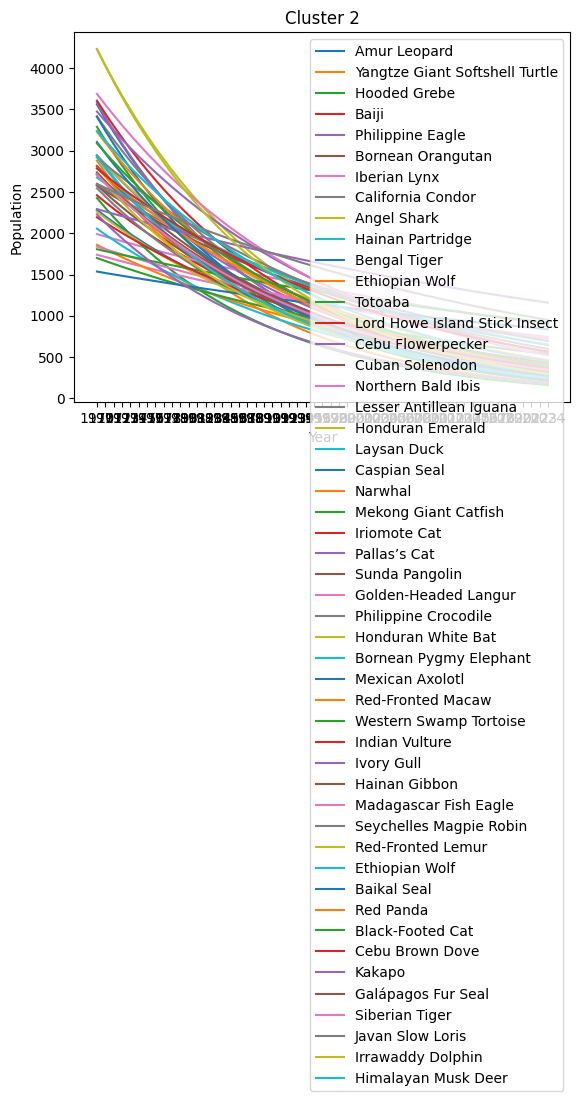

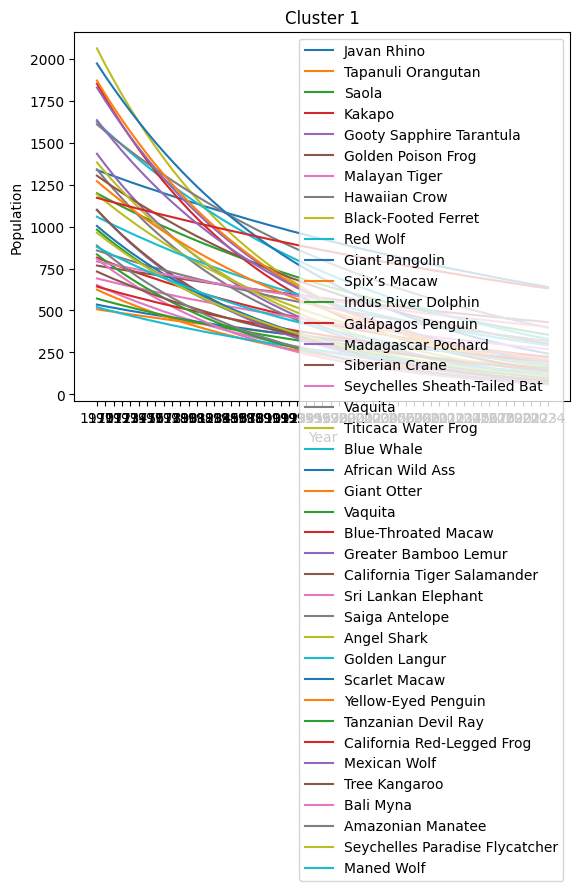

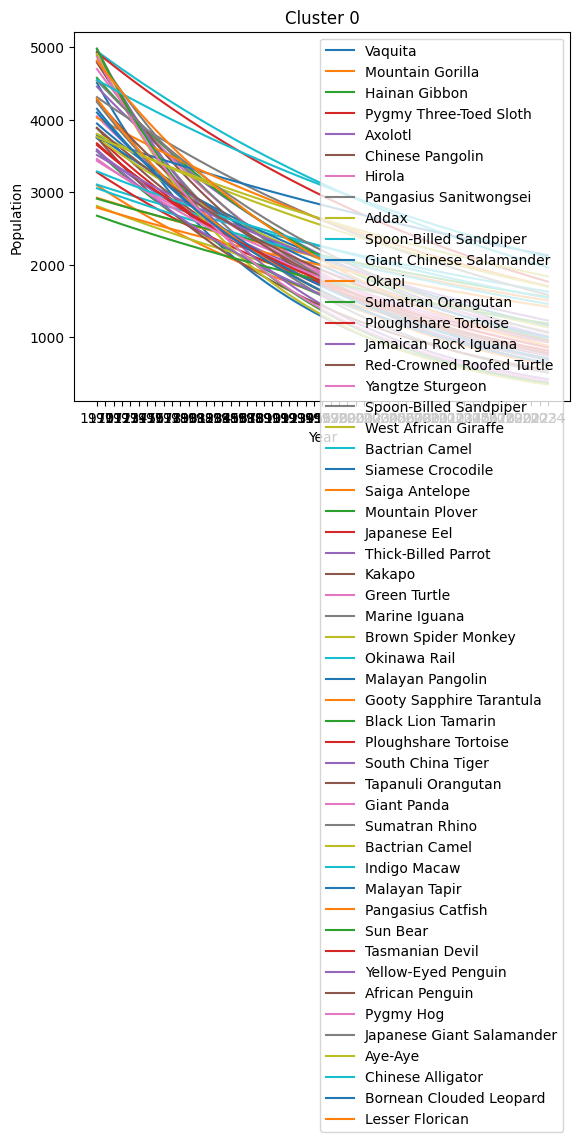

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')  # Use your actual file name

# Extract years as features
years = [str(year) for year in range(1970, 2025)]
data_years = data[years]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
data['Cluster'] = kmeans.fit_predict(data_years)

# Inspect clusters
print(data[['Species', 'Cluster']])

# Visualize clusters
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    for _, row in cluster_data.iterrows():
        plt.plot(years, row[years].values, label=row['Species'])
    plt.title(f'Cluster {cluster}')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.legend()
    plt.show()


                            Species  Extinction_Year
0                      Amur Leopard      2019.662721
1                       Javan Rhino      2070.978903
2                           Vaquita      2020.703000
3                  Mountain Gorilla      2038.779928
4                Tapanuli Orangutan      2064.281964
..                              ...              ...
137               Irrawaddy Dolphin      2019.693960
138  Seychelles Paradise Flycatcher      2023.541786
139                 Lesser Florican      2030.379555
140             Himalayan Musk Deer      2026.034668
141                      Maned Wolf      2032.152137

[142 rows x 2 columns]


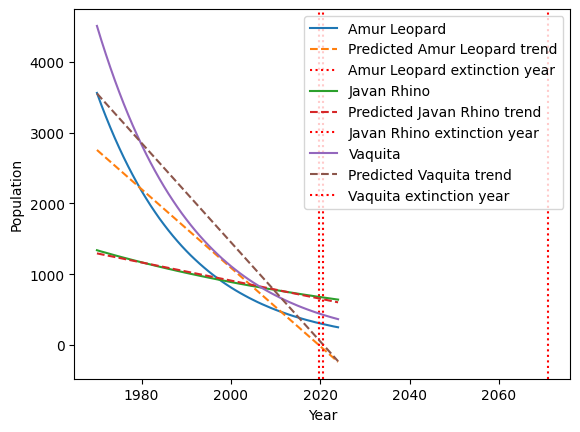

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')  # Use your actual file name

# List of years
years = [str(year) for year in range(1970, 2025)]

# drop Species,Habitat,Country,Latitude,Longitude
X = data.drop(columns=['Species', 'Habitat', 'Country', 'Latitude', 'Longitude'])



# List of years
years = [str(year) for year in range(1970, 2025)]

# Define a function to predict the extinction year for each species using linear regression
def predict_extinction_year(row):
    # Extract years and population data
    years_data = np.array([int(col) for col in row.index if col.isdigit()]).reshape(-1, 1)
    population = row[years].values
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(years_data, population)
    
    # Predict the year when population reaches zero
    extinction_year = (0 - model.intercept_) / model.coef_[0]
    
    return extinction_year

# Apply the function to each row in the dataset
data['Extinction_Year'] = data.apply(predict_extinction_year, axis=1)

# Print the results
print(data[['Species', 'Extinction_Year']])

# Optionally, visualize the trends and predictions for the first few species
for i in range(3):  # Adjust the range as needed
    species_data = data.iloc[i]
    years_data = np.array([int(col) for col in species_data.index if col.isdigit()]).reshape(-1, 1)
    population = species_data[years].values
    plt.plot(years_data, population, label=species_data['Species'])
    
    # Linear regression prediction
    model = LinearRegression()
    model.fit(years_data, population)
    plt.plot(years_data, model.predict(years_data), linestyle='--', label=f'Predicted {species_data["Species"]} trend')
    extinction_year = (0 - model.intercept_) / model.coef_[0]
    plt.axvline(x=extinction_year, color='r', linestyle=':', label=f'{species_data["Species"]} extinction year')
    
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()
plt.show()


                            Species Extinction_Year
0                      Amur Leopard          [2033]
1                       Javan Rhino          [2110]
2                           Vaquita          [2035]
3                  Mountain Gorilla          [2063]
4                Tapanuli Orangutan          [2096]
..                              ...             ...
137               Irrawaddy Dolphin          [2033]
138  Seychelles Paradise Flycatcher          [2039]
139                 Lesser Florican          [2050]
140             Himalayan Musk Deer          [2043]
141                      Maned Wolf          [2052]

[142 rows x 2 columns]


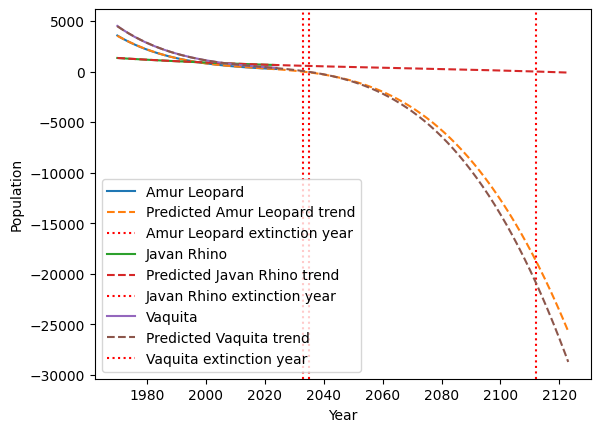

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')  # Use your actual file name

# List of years
years = [str(year) for year in range(1970, 2025)]

# Define a function to predict the extinction year for each species using polynomial regression
def predict_extinction_year(row, degree=4):
    # Extract years and population data
    years_data = np.array([int(col) for col in row.index if col.isdigit()]).reshape(-1, 1)
    population = row[years].values
    
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    years_poly = poly.fit_transform(years_data)
    
    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(years_poly, population)
    
    # Predict the year when population reaches zero
    future_years = np.arange(years_data.min(), years_data.max() + 100).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    predicted_population = model.predict(future_years_poly)
    extinction_year_index = np.where(predicted_population <= 0)[0]
    extinction_year = future_years[extinction_year_index[0]] if len(extinction_year_index) > 0 else None
    
    return extinction_year

# Apply the function to each row in the dataset
data['Extinction_Year'] = data.apply(predict_extinction_year, axis=1)

# Print the results
print(data[['Species', 'Extinction_Year']])

# Optionally, visualize the trends and predictions for the first few species
for i in range(3):  # Adjust the range as needed
    species_data = data.iloc[i]
    years_data = np.array([int(col) for col in species_data.index if col.isdigit()]).reshape(-1, 1)
    population = species_data[years].values
    
    # Generate polynomial features
    poly = PolynomialFeatures(degree=3)
    years_poly = poly.fit_transform(years_data)
    
    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(years_poly, population)
    
    # Predict future population
    future_years = np.arange(years_data.min(), years_data.max() + 100).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    predicted_population = model.predict(future_years_poly)
    
    # Plot original data and fitted curve
    plt.plot(years_data, population, label=species_data['Species'])
    plt.plot(future_years, predicted_population, linestyle='--', label=f'Predicted {species_data["Species"]} trend')
    
    # Predict and plot extinction year
    extinction_year_index = np.where(predicted_population <= 0)[0]
    if len(extinction_year_index) > 0:
        extinction_year = future_years[extinction_year_index[0]]
        plt.axvline(x=extinction_year, color='r', linestyle=':', label=f'{species_data["Species"]} extinction year')

plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

# write to csv
data[['Species', 'Extinction_Year']].to_csv('data_with_extinction_years.csv', index=False)


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Data_cleaned.csv')  # Use your actual file name

# drop ID,Class,Order,Family,Genus,Location,Country,All_countries,Region,IPBES_region,IPBES_subregion,Latitude,Longitude,Specific_location,System,T_realm,T_biome,FW_realm,FW_biome,M_realm,M_ocean,M_biome,Units
data = data.drop(columns=['ID', 'Native','Class', 'Order', 'Family', 'Genus', 'Location', 'Country', 'All_countries', 'Region', 'IPBES_region', 'IPBES_subregion', 'Latitude', 'Longitude', 'Specific_location', 'System', 'T_realm', 'T_biome', 'FW_realm', 'FW_biome', 'M_realm', 'M_ocean', 'M_biome', 'Units'])

# drop nan
# data = data.dropna()

print(data.shape)

X = data.drop(columns=['Species'])

data = data.drop_duplicates(subset=['Species'])

print(X.shape)

# data = data.fillna(method='ffill', axis=1)

(35996, 72)
(35996, 71)


In [14]:

print(data.head())
print(X.shape)


        Species  1950  1951  1952  1953  1954  1955  1956  1957  1958  ...  \
0     regulorum   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1  sechellensis   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  30.0  ...   
2   sechellarum   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4     punctatus   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5   ochropectus   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

    2012   2013   2014   2015   2016   2017   2018   2019   2020  \
0   10.8   10.8   10.8   10.8   10.8   10.8   10.8   10.8   10.8   
1  430.0  430.0  430.0  430.0  430.0  430.0  430.0  430.0  430.0   
2   21.0   21.0   21.0   21.0   21.0   21.0   21.0   21.0   21.0   
4   61.0   61.0   61.0   61.0   61.0   61.0   61.0   61.0   61.0   
5  750.0  750.0  750.0  750.0  750.0  750.0  750.0  750.0  750.0   

   Extinction_Year  
0             None  
1             None  
2           [2030]  
4           [1976]  
5           [2023

In [ ]:
#list of years
years = [str(year) for year in range(1970, 2020)]

def predict_extinction_year(row, degree=4):
    # Extract years and population data
    years_data = np.array([int(col) for col in row.index if col.isdigit()]).reshape(-1, 1)
    population = row[years].values
    
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    years_poly = poly.fit_transform(years_data)
    
    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(years_poly, population)
    
    # Predict the year when population reaches zero
    future_years = np.arange(years_data.min(), years_data.max() + 100).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    predicted_population = model.predict(future_years_poly)
    extinction_year_index = np.where(predicted_population <= 0)[0]
    extinction_year = future_years[extinction_year_index[0]] if len(extinction_year_index) > 0 else None
    
    return extinction_year

In [13]:


# List of years
years = [str(year) for year in range(1970, 2020)]

print(data["Species"].shape)

# Define a function to predict the extinction year for each species using polynomial regression
def predict_extinction_year(row, degree=3):
    
    
    # Extract years and population data
    years_data = np.array([int(col) for col in row.index if col.isdigit()]).reshape(-1, 1)
    population = row[years].values
    
    # get the years by looking at how many nans are in row
    years_data = years_data[(len(years_data) - len(population)):]
    
    years_data = years_data[~np.isnan(population)]
    population = population[~np.isnan(population)]
    
    if(len(years_data) == 0):
        return None
    
    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    years_poly = poly.fit_transform(years_data)
    
    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(years_poly, population)
    
    # Predict the year when population reaches zero
    future_years = np.arange(years_data.min(), years_data.max() + 100).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    predicted_population = model.predict(future_years_poly)
    extinction_year_index = np.where(predicted_population <= 0)[0]
    extinction_year = future_years[extinction_year_index[0]] if len(extinction_year_index) > 0 else None
    
    return extinction_year

print(X.shape)

# Apply the function to each row in the dataset
data['Extinction_Year'] = X.apply(predict_extinction_year, axis=1)

# Print the results
print(data[['Species', 'Extinction_Year']])

# Optionally, visualize the trends and predictions for the first few species
# for i in range(3):  # Adjust the range as needed
#     species_data = data.iloc[i]
#     years_data = np.array([int(col) for col in species_data.index if col.isdigit()]).reshape(-1, 1)
#     population = species_data[years].values
    
#     years_data = years_data[(len(years_data) - len(population)):]
    
#     years_data = years_data[~np.isnan(population)]
#     population = population[~np.isnan(population)]
    
#     if(len(years_data) == 0):
#         continue
    
#     # Generate polynomial features
#     poly = PolynomialFeatures(degree=3)
#     years_poly = poly.fit_transform(years_data)
    
#     # Train the polynomial regression model
#     model = LinearRegression()
#     model.fit(years_poly, population)
    
#     # Predict future population
#     future_years = np.arange(years_data.min(), years_data.max() + 100).reshape(-1, 1)
#     future_years_poly = poly.transform(future_years)
#     predicted_population = model.predict(future_years_poly)
    
#     # Plot original data and fitted curve
#     plt.plot(years_data, population, label=species_data['Species'])
#     plt.plot(future_years, predicted_population, linestyle='--', label=f'Predicted {species_data["Species"]} trend')
    
#     # Predict and plot extinction year
#     extinction_year_index = np.where(predicted_population <= 0)[0]
#     if len(extinction_year_index) > 0:
#         extinction_year = future_years[extinction_year_index[0]]
#         plt.axvline(x=extinction_year, color='r', linestyle=':', label=f'{species_data["Species"]} extinction year')

# plt.xlabel('Year')
# plt.ylabel('Population')
# plt.legend()
# plt.show()

# write to csv
print(data[['Species', 'Extinction_Year']])
data[['Species', 'Extinction_Year']].to_csv('data_with_extinction_years.csv', index=False)


(3736,)
(35996, 71)
              Species Extinction_Year
0           regulorum            None
1        sechellensis            None
2         sechellarum          [2030]
4           punctatus          [1976]
5         ochropectus          [2023]
...               ...             ...
35980        carpalis          [2026]
35982     chrysoparia          [2094]
35984       dominicus          [2052]
35986  pallidicinctus          [2026]
35987   crassirostris            None

[3736 rows x 2 columns]
              Species Extinction_Year
0           regulorum            None
1        sechellensis            None
2         sechellarum          [2030]
4           punctatus          [1976]
5         ochropectus          [2023]
...               ...             ...
35980        carpalis          [2026]
35982     chrysoparia          [2094]
35984       dominicus          [2052]
35986  pallidicinctus          [2026]
35987   crassirostris            None

[3736 rows x 2 columns]


In [16]:
# import species
import pandas as pd

species = pd.read_csv('data_with_extinction_years.csv')

# Load the dataset
data = pd.read_csv('Data_cleaned.csv')  # Use your actual file name

data['Species'] = data['Species'].str.lower()

# for emtpy entries in exntinction year, fill with Null
species['Extinction_Year'] = species['Extinction_Year'].fillna('Null')
combined_data = data.drop(columns=['ID', 'Longitude', 'Latitude', 'Native','Class', 'Order', 'Family', 'Genus', 'All_countries', 'IPBES_region', 'IPBES_subregion', 'System', 'Location', 'Specific_location', 'T_realm', 'T_biome', 'FW_realm', 'FW_biome', 'M_realm', 'M_ocean', 'M_biome', 'Units'])

# drop years 1950-2025
years = [str(year) for year in range(1950, 2021)]
combined_data = combined_data.drop(columns=years)

combined_data['Extinction'] = species['Extinction_Year']

print(combined_data.head())

# once arrive at null or no values truncate
combined_data = combined_data[:3700]

combined_data.to_csv('combined_data.csv', index=False)


        Species     Country  Region Extinction
0     regulorum      Uganda  Africa       Null
1  sechellensis  Seychelles  Africa       Null
2   sechellarum  Seychelles  Africa     [2030]
3   sechellarum  Seychelles  Africa     [1976]
4     punctatus   Mauritius  Africa     [2023]
